### Exploring traffic, impressions and interactions
Prints a list of outlier units and does some data exploration. Time period is last 30 days, 13 Nov to 12 Dec.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
traffic = pd.read_csv("traffic.csv", index_col=0)
impressions = pd.read_csv("impression.csv", index_col=0)
interactions = pd.read_csv("interaction.csv", index_col=0)

In [3]:
impression_rate = impressions/traffic * 100
interaction_rate = interactions/impressions * 100
impression_rate = impression_rate.fillna(0)
interaction_rate = interaction_rate.fillna(0)
interaction_traffic_rate = interactions/traffic * 100
interaction_traffic_rate = interaction_traffic_rate.fillna(0)

In [7]:
#Function searches for outliers in a dataframe and stores them in a boolean dataframe
#Then prints the index row and column, i.e. date and unit of the outliers
#Prints the outliers on most recent date

def print_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    IQR_adjusted = IQR
    IQR_adjusted[IQR_adjusted == 0] = np.nan
    IQR_median = IQR_adjusted.median()
    outliers = (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)) | (data > 100) | (data < (Q1 - 1.5 * IQR_median)) | (data > (Q3 + 1.5 * IQR)) 
    no_outliers = outliers[outliers].count().sum()/outliers.count().sum()
    print("Outliers:", round(no_outliers*100,2), "%")
    print(list(outliers[outliers].stack().index))
    print("\n")
    #Just do the most recent date:
    outliers_last = outliers.iloc[[-1],:]
    no_outliers_last = outliers_last[outliers_last].count().sum()
    print("Outliers on most recent day:", round(no_outliers_last,2))
    print(list(outliers_last[outliers_last].stack().index))
    return outliers, outliers_last

#### Impression rate - outliers

In [5]:
outlier_impressions, outlier_impressions_last = print_outliers(impression_rate)

Outliers: 5.81 %
[('2018-11-13', 'Calvin Klein Manila Fiestamall One Gold'), ('2018-11-13', 'Times Square'), ('2018-11-14', 'Calvin Klein Manila Fiestamall Obsessed'), ('2018-11-14', 'Calvin Klein Manila Fiestamall One Gold'), ('2018-11-14', 'Calvin Klein Moscow Airport'), ('2018-11-15', 'Calvin Klein Moscow Airport'), ('2018-11-15', 'Coty Gondola Shanghai Explorium 2.0'), ('2018-11-15', "Kiehl's Times Square HK"), ('2018-11-16', 'Calvin Klein Manila Fiestamall Obsessed'), ('2018-11-16', 'Calvin Klein Manila Fiestamall One Gold'), ('2018-11-16', 'Calvin Klein Moscow Airport'), ('2018-11-16', "Kiehl's Telford Plaza HK"), ('2018-11-17', "Kiehl's Langham Place HK"), ('2018-11-17', "Kiehl's NTP Animation Table HK"), ('2018-11-17', "Kiehl's Times Square HK"), ('2018-11-17', "Kiehl's Tuen Mun Town Plaza HK"), ('2018-11-17', 'Times Square'), ('2018-11-18', 'Calvin Klein Manila Fiestamall Obsessed'), ('2018-11-18', 'Calvin Klein Moscow Airport'), ('2018-11-19', 'Calvin Klein Manila Fiestamall 

#### Interaction rate - outliers

In [6]:
outlier_interactions, outlier_interactions_last= print_outliers(interaction_rate)

Outliers: 4.75 %
[('2018-11-14', 'Hugo Boss Mumbai Airport'), ('2018-11-15', 'Estee Lauder Tokyo RN Tester'), ('2018-11-17', 'Estee Lauder Tokyo RN Tester'), ('2018-11-18', 'Estee Lauder Tokyo RN Tester'), ('2018-11-19', 'Estee Lauder Beijing RN Tester'), ('2018-11-20', 'Calvin Klein London Heathrow'), ('2018-11-20', 'Estee Lauder Beijing RN Tester'), ('2018-11-20', 'Estee Lauder Tokyo RN Tester'), ('2018-11-21', 'Estee Lauder Beijing RN Tester'), ('2018-11-21', 'Hugo Boss London Heathrow'), ('2018-11-22', 'Estee Lauder Beijing RN Tester'), ('2018-11-22', 'Estee Lauder Tokyo RN Tester'), ('2018-11-22', 'Hugo Boss London Heathrow'), ('2018-11-23', 'Estee Lauder Tokyo RN Tester'), ('2018-11-23', 'Hugo Boss London Heathrow'), ('2018-11-24', 'Hugo Boss London Heathrow'), ('2018-11-25', 'Estee Lauder Tokyo RN Tester'), ('2018-11-25', 'Hugo Boss London Heathrow'), ('2018-11-26', 'Estee Lauder Tokyo RN Tester'), ('2018-11-26', 'Hugo Boss London Heathrow'), ('2018-11-27', 'Calvin Klein Manila 

#### Visualizing impression rate by station:

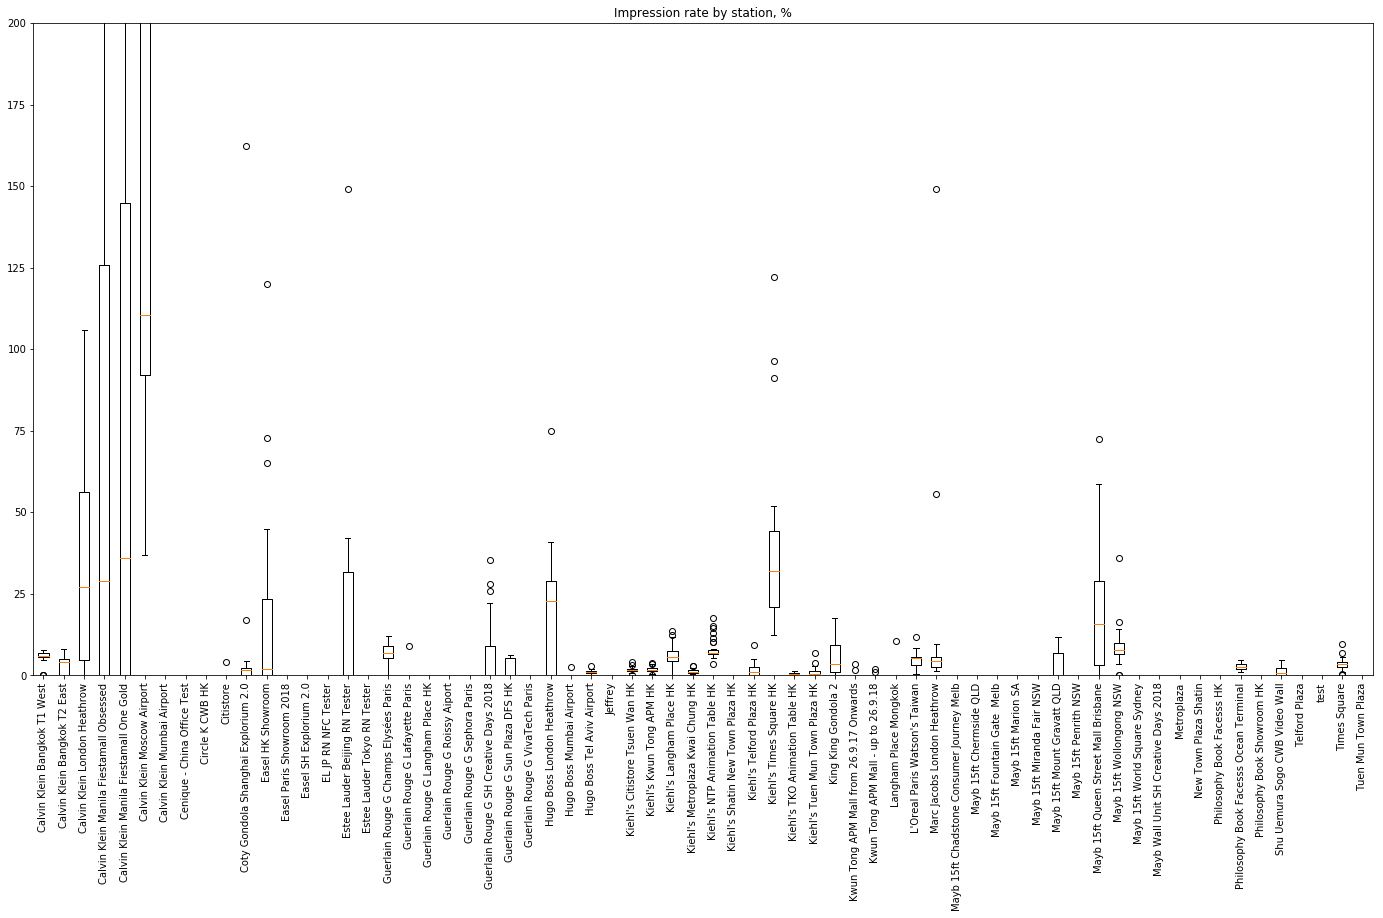

In [7]:
fig7, ax7 = plt.subplots(figsize=(24, 12))
ax7.set_title('Impression rate by station, %')
ax7.boxplot(impression_rate.transpose())
ax7.set_ylim(0,200)
plt.xticks(np.arange(impression_rate.shape[1])+1, impression_rate.transpose().index, rotation=90)
plt.show()

#### Visualizing interaction rate by station
Interaction data seems quite spotty. There are a whole bunch of errors not even shown here, where the sensor logs interactions but not impressions, so interaction rate is infinity.

C:\Users\ShawnBan\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1794: RuntimeWarning: invalid value encountered in double_scalars
  notch_min = med - 1.57 * iqr / np.sqrt(N)


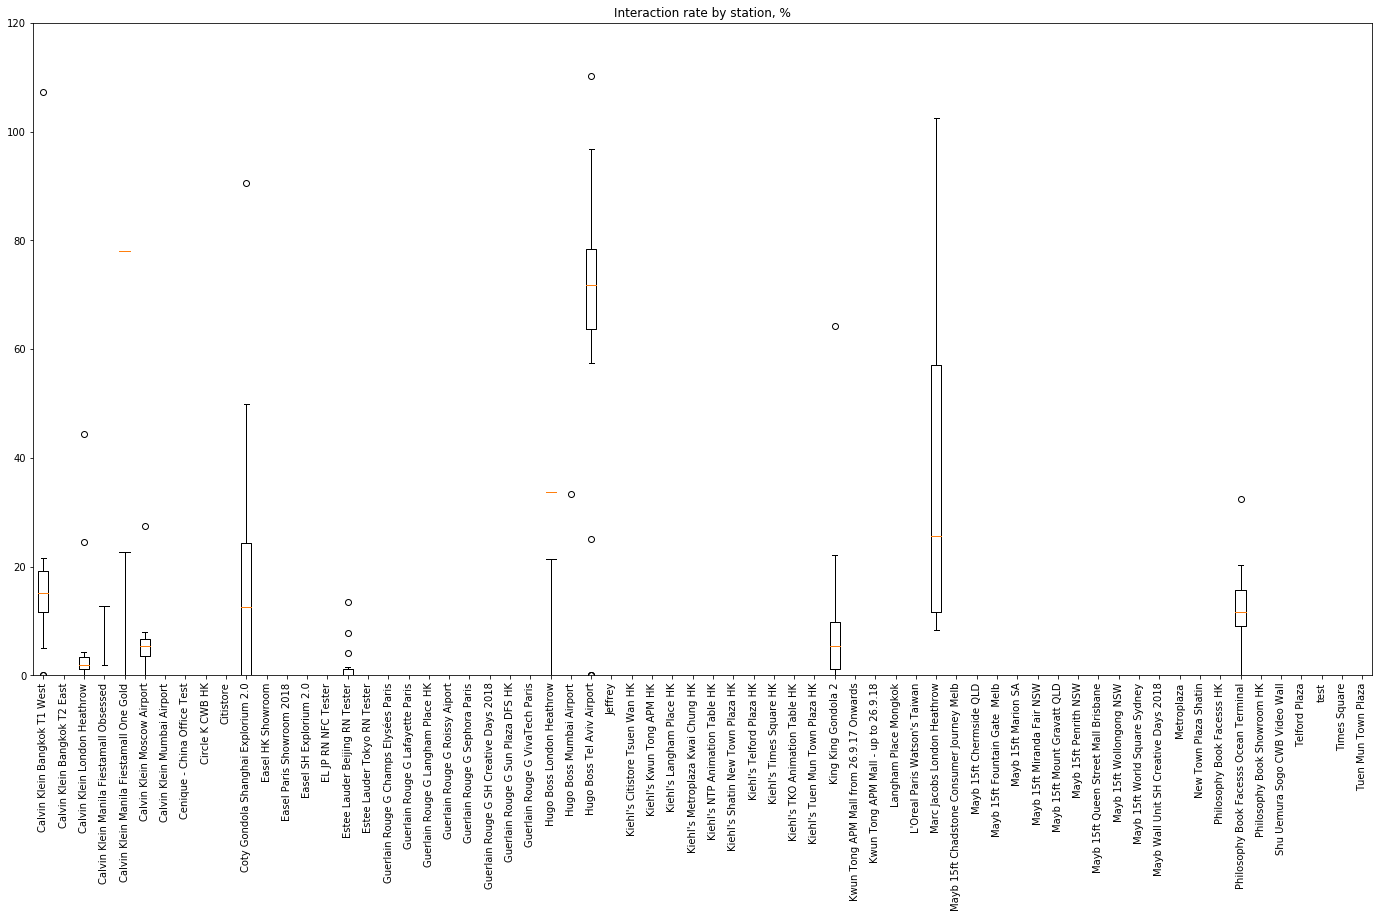

In [8]:
fig8, ax8 = plt.subplots(figsize=(24, 12))
ax8.set_title('Interaction rate by station, %')
ax8.boxplot(interaction_rate.transpose())
ax8.set_ylim(0,120)
plt.xticks(np.arange(interaction_rate.shape[1])+1, interaction_rate.transpose().index, rotation=90)
plt.show()

#### Chart outlier units - traffic and impressions

In [73]:
#Saves the charts of most recent problem units for impressions:
units_to_chart = outlier_impressions.columns.values[outlier_impressions_last.sum() > 0]
traffic2 = traffic[units_to_chart]
impressions2 = impressions[units_to_chart]

for i in np.arange(units_to_chart.size):
    traffic2.iloc[:,i].plot()
    impressions2.iloc[:,i].plot()
    plt.title(traffic2.columns.values[i])
    plt.legend(labels=['traffic', 'impressions'],loc='best')
    plt.savefig('impression_problem'+str(i)+'.png')
    plt.close()

#### Chart outlier units - impressions and interactions

In [75]:
#Saves the charts of most recent problem units for interactions:
units_to_chart2 = outlier_interactions.columns.values[outlier_interactions_last.sum() > 0]
impressions3 = impressions[units_to_chart2]
interactions3 = interactions[units_to_chart2]

for i in np.arange(units_to_chart2.size):
    impressions3.iloc[:,i].plot()
    interactions3.iloc[:,i].plot()
    plt.title(impressions3.columns.values[i])
    plt.legend(labels=['impressions', 'interactions'],loc='best')
    plt.savefig('interaction_problem'+str(i)+'.png')
    plt.close()